# Only Plotting

In [1]:
import os
import torch

# Import our module containing helper functions
import gravann.polyhedral

# plotting stuff
%matplotlib notebook

# Ensure that changes in imported module (gravann most importantly) are autoreloaded
%load_ext autoreload
%autoreload 2

# If possible enable CUDA
gravann.enableCUDA()
gravann.fixRandomSeeds()
device = os.environ["TORCH_DEVICE"]
print("Will use device ", device)

C:\Users\josch\miniconda3\envs\geodesynet\lib\site-packages\pyvista\themes.py:131: PyVistaDeprecationWarning: use "dark" instead of "night" theme
  warnings.warn('use "dark" instead of "night" theme', PyVistaDeprecationWarning)


Available devices  1
__pyTorch VERSION: 1.13.1
__CUDNN VERSION: 8500
__Number CUDA Devices: 1
Active CUDA Device: GPU 0
Setting default tensor type to Float32
Will use device  cuda:0


We first chose one of the following samples:

    "eros", "bennu", "itokawa", "churyumov-gerasimenko", "planetesimal", "torus", "bennu_nu", "itokawa_nu", "planetesimal_nu"

In [2]:
##################### PLEASE SPECIFY THIS ####################
# one of "eros", "bennu", "itokawa", "churyumov-gerasimenko", "planetesimal", "torus", "bennu_nu", "itokawa_nu", "planetesimal_nu"
SAMPLE_NAME = "churyumov-gerasimenko"
# can be freely chosen
MODEL_NAME = "first"

N_QUADRATUR = 30000

# Plotting
NUMBER_OF_POINTS_FOR_COMPARISON = 1000

# Real Math Stuff
NUMBER_OF_POINTS_FOR_VALIDATION = 10000

BATCH_SIZE = 100
##############################################################

MODEL_FILENAME_MASCON = f"models_polyhedral/{SAMPLE_NAME}_mascon_{MODEL_NAME}.mdl"
MODEL_FILENAME_POLYHEDRAL = f"models_polyhedral/{SAMPLE_NAME}_polyhedral_{MODEL_NAME}.mdl"



# Re-specify the encoding if another encoding was used for training!
encoding = gravann.direct_encoding()

mesh_vertices, mesh_faces = gravann.load_polyhedral_mesh(SAMPLE_NAME)
density = gravann.polyhedral.calculate_density(mesh_vertices, mesh_faces)

# Only for the legacy plots required
mascon_points, mascon_masses = gravann.load_mascon_data(SAMPLE_NAME)

print(f"Chosen body: {SAMPLE_NAME}")
print(f"Loaded Polyhedral Mesh Data:")
print(f"Loaded the Mesh of {SAMPLE_NAME}")
print(f"Number of vertices: {len(mesh_vertices)}")
print(f"Number of faces (triangles): {len(mesh_faces)}")
print(f"Calculated Density: {density}")

Chosen body: churyumov-gerasimenko
Loaded Polyhedral Mesh Data:
Loaded the Mesh of churyumov-gerasimenko
Number of vertices: 9149
Number of faces (triangles): 18294
Calculated Density: 1.6605502606980964


## 0 - Comparing polyhedral model & mascon model
Next, we can plot a comparison between the polyhedral gravity model's labels and the mascon labels:

Discarding 0 of 18294 points in altitude sampler which did not meet requested altitude.
Splitting in left / right hemisphere
Left:  470  points.
Right:  530  points.


<IPython.core.display.Javascript object>


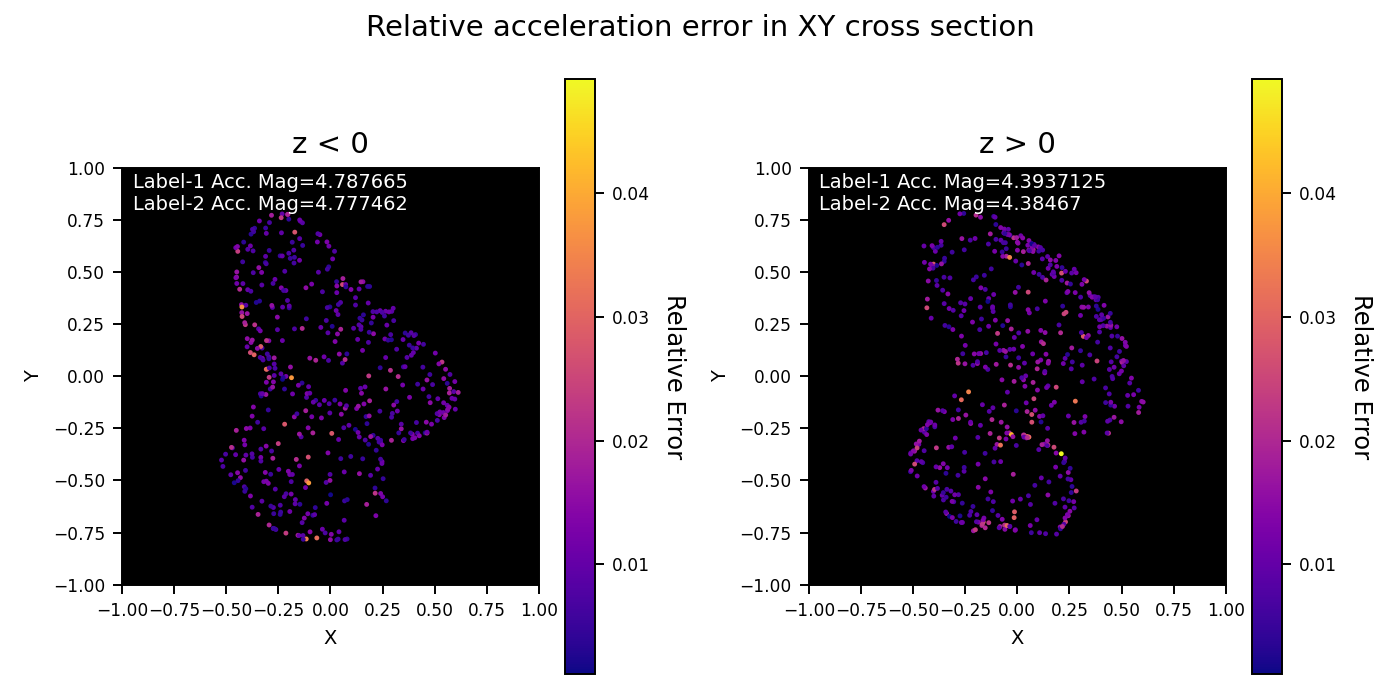

(<AxesSubplot: title={'center': 'z > 0'}, xlabel='X', ylabel='Y'>,
 tensor([[-1.8412,  1.0056, -2.0233],
         [ 2.5567, -1.1785, -1.3470],
         [-0.8771, -0.1867, -2.9000],
         ...,
         [ 2.4575, -0.7343, -1.6671],
         [-2.5059, -2.1521,  0.3286],
         [ 2.8031, -0.0391, -1.0091]]))

In [3]:
gravann.polyhedral.plot_compare_acceleration(SAMPLE_NAME,
                                             compare_mode=('mascon', 'polyhedral'),
                                             plane="XY",
                                             N=NUMBER_OF_POINTS_FOR_COMPARISON,
                                             logscale=False,
                                             altitude=1e-5)

## 1 - Loading the models

C:\Users\josch\miniconda3\envs\geodesynet\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Sampling points...: 1062it [00:00, 2113.55it/s]                                                                        


<IPython.core.display.Javascript object>


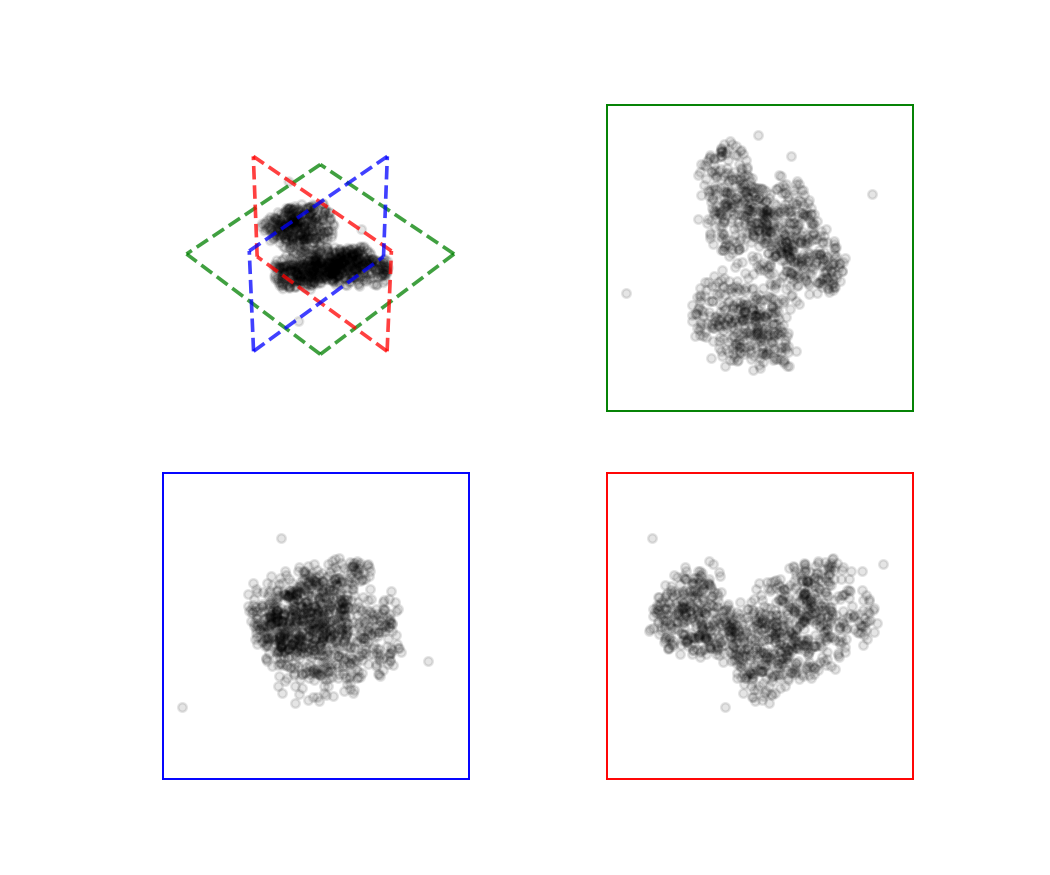

<IPython.core.display.Javascript object>


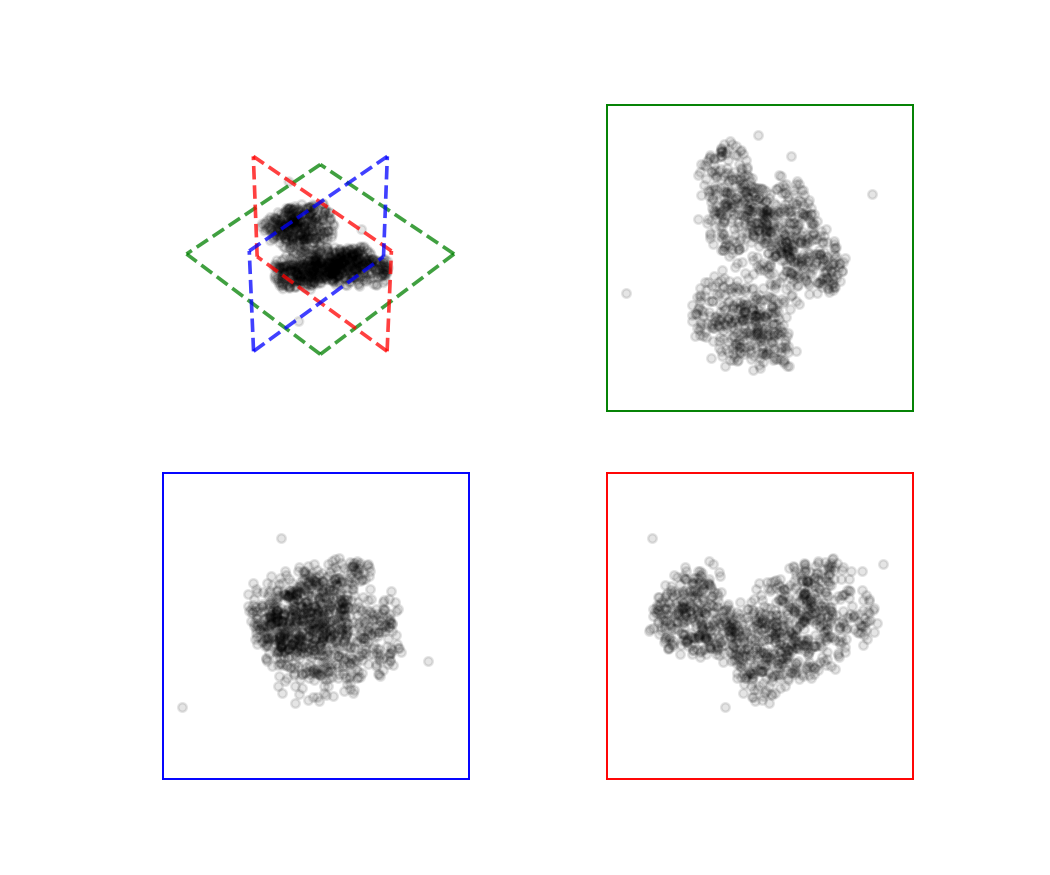

In [4]:
# POLYHEDRAL MODEL
polyhedral_model = gravann.init_network(encoding, n_neurons=100, model_type="siren", activation = gravann.AbsLayer())

polyhedral_model.load_state_dict(torch.load(MODEL_FILENAME_POLYHEDRAL))

polyhedral_c = gravann.compute_c_for_model_v2(polyhedral_model, encoding, 'polyhedral',
                                              mascon_points=mascon_points,
                                              mascon_masses=mascon_masses,
                                              mesh_vertices=mesh_vertices,
                                              mesh_faces=mesh_faces,
                                              density=density,
                                              use_acc = True)
gravann.plot_model_rejection(polyhedral_model, encoding, views_2d=True, bw=True, N=NUMBER_OF_POINTS_FOR_COMPARISON, alpha=0.1, s=50, c=polyhedral_c, crop_p=0.1, progressbar=True)

Sampling points...: 1040it [00:00, 2921.42it/s]                                                                        


<IPython.core.display.Javascript object>


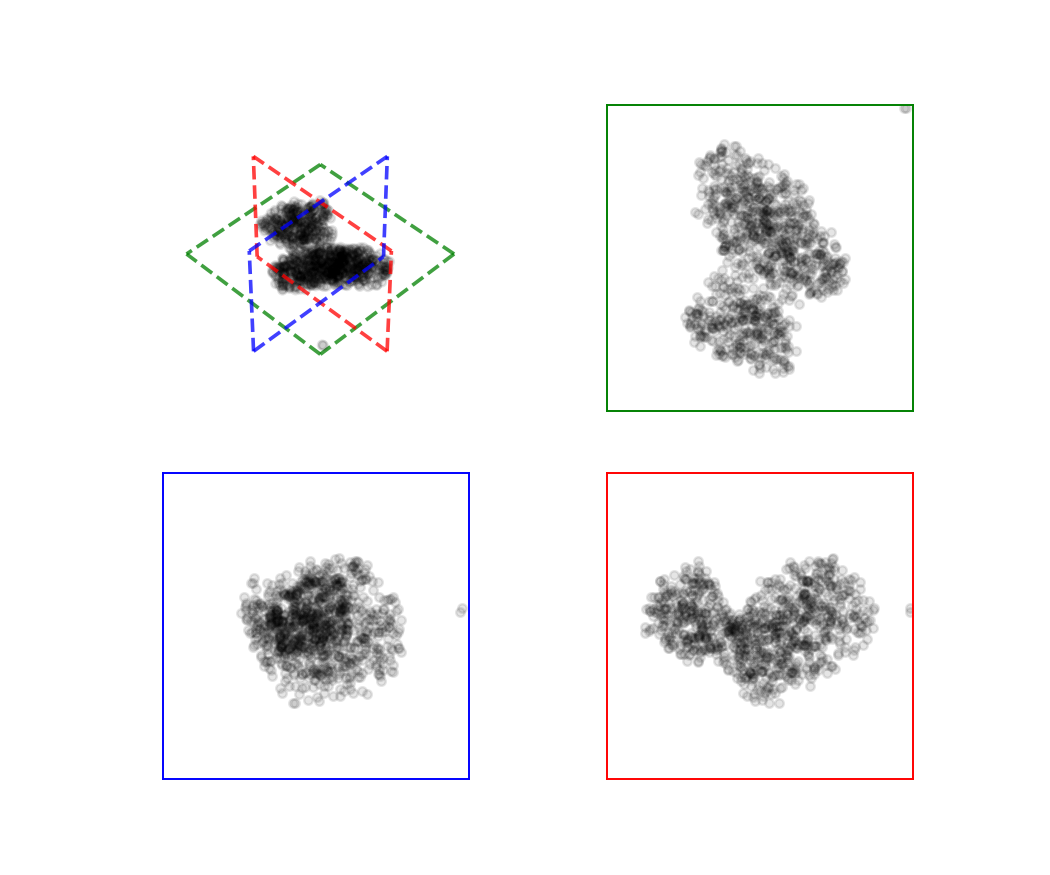

<IPython.core.display.Javascript object>


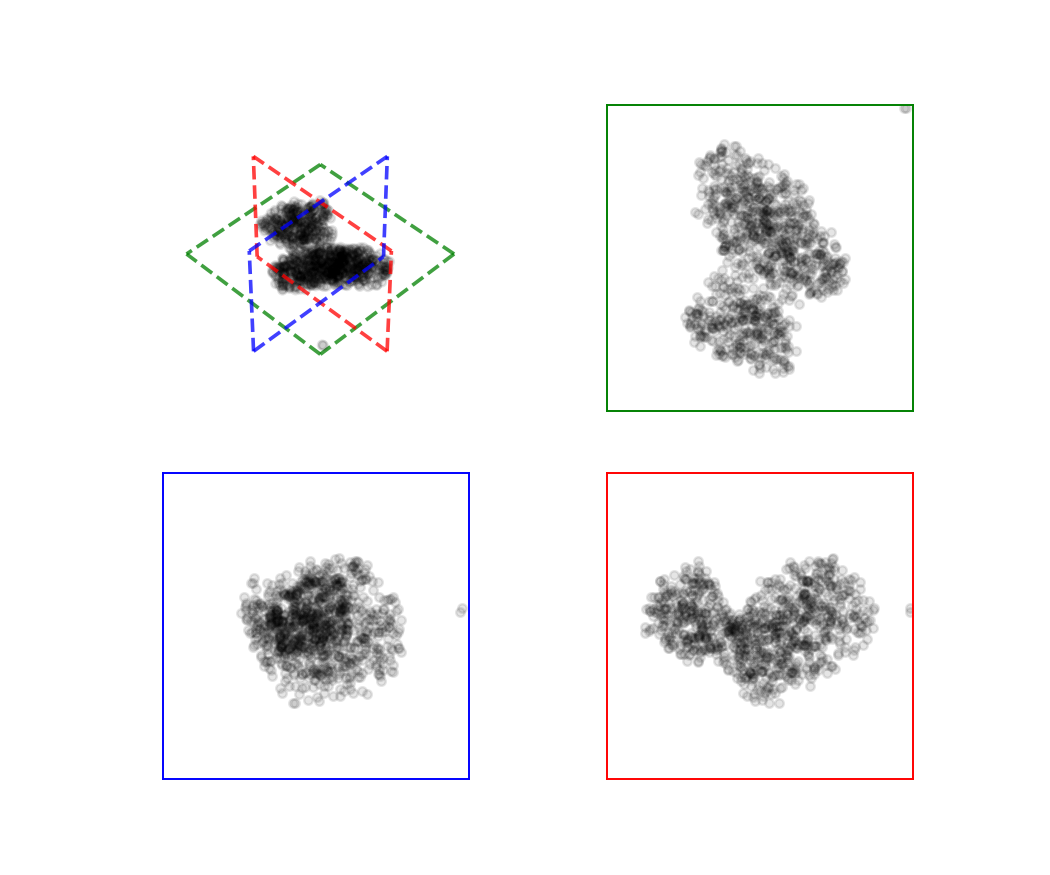

In [5]:
# MASCON MODEL
mascon_model = gravann.init_network(encoding, n_neurons=100, model_type="siren", activation = gravann.AbsLayer())

mascon_model.load_state_dict(torch.load(MODEL_FILENAME_MASCON))

mascon_c = gravann.compute_c_for_model_v2(mascon_model, encoding, 'mascon',
                                          mascon_points=mascon_points,
                                          mascon_masses=mascon_masses,
                                          mesh_vertices=mesh_vertices,
                                          mesh_faces=mesh_faces,
                                          density=density,
                                          use_acc = True)
gravann.plot_model_rejection(mascon_model, encoding, views_2d=True, bw=True, N=NUMBER_OF_POINTS_FOR_COMPARISON, alpha=0.1, s=50, c=mascon_c, crop_p=0.1, progressbar=True)

## 2 - Comparing Polyhedral Model to the Polyhedral Ground Truth

Discarding 0 of 18294 points in altitude sampler which did not meet requested altitude.
Splitting in left / right hemisphere
Left:  480  points.
Right:  520  points.


<IPython.core.display.Javascript object>


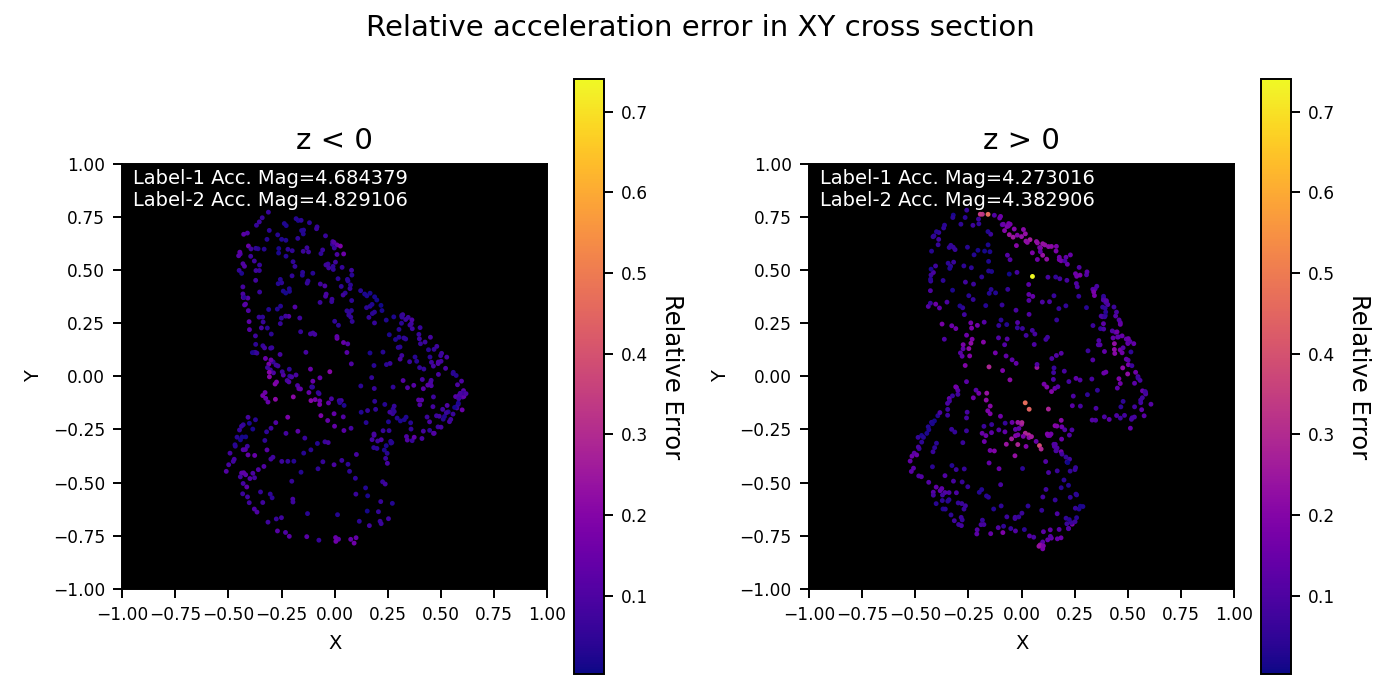

(<AxesSubplot: title={'center': 'z > 0'}, xlabel='X', ylabel='Y'>,
 tensor([[-0.2695,  1.5836, -2.0836],
         [-1.8789, -2.7171,  0.3231],
         [ 1.8627, -1.1228, -1.8435],
         ...,
         [-1.1434,  0.6440, -2.9352],
         [-1.3687,  0.4089, -2.4807],
         [ 2.8920, -0.5042, -0.5924]]))

In [6]:
gravann.polyhedral.plot_compare_acceleration(SAMPLE_NAME,
                                             compare_mode=('model', 'polyhedral'),
                                             model_1=(polyhedral_model, encoding, polyhedral_c),
                                             plane="XY",
                                             N=NUMBER_OF_POINTS_FOR_COMPARISON,
                                             logscale=False,
                                             altitude=1e-5)

In [7]:
polyhedral_model2polyhedral_gt = gravann.validation_v2(polyhedral_model, encoding, SAMPLE_NAME, 'polyhedral', use_acc=True,
                mesh_vertices=mesh_vertices,
                mesh_faces=mesh_faces,
                N=NUMBER_OF_POINTS_FOR_VALIDATION,
                N_integration=N_QUADRATUR,
                batch_size=BATCH_SIZE,
                progressbar=True)

Computing validation...:  65%|████████████████████████████████▍                 | 55000/84894 [02:25<01:06, 451.63it/s]

Discarding 2987 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  77%|██████████████████████████████████████▎           | 65000/84894 [03:15<00:57, 345.95it/s]

Discarding 8598 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  88%|████████████████████████████████████████████▏     | 75000/84894 [03:58<00:28, 347.47it/s]

Discarding 15222 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...: 85000it [04:34, 309.62it/s]                                                                   


In [8]:
polyhedral_model2polyhedral_gt

,Altitude,Normalized L1 Loss,Normalized Relative Component Loss,RMSE,relRMSE
0,Low Altitude,0.089210,0.096695,0.440112,0.173912
1,High Altitude,0.046803,0.058989,0.317050,0.150623
2,Altitude_0,0.049718,0.057614,0.184949,0.071872
3,Altitude_1,0.023579,0.031051,0.092992,0.040144
4,Altitude_2,0.007644,0.015526,0.032366,0.023295


## 3 - Comparing Polyhedral Model to the Mascon Ground Truth

In [9]:
polyhedral_model2mascon_gt = gravann.validation_v2(polyhedral_model, encoding, SAMPLE_NAME, 'mascon', use_acc=True,
                mascon_points=mascon_points,
                mascon_masses=mascon_masses,
                N=NUMBER_OF_POINTS_FOR_VALIDATION,
                N_integration=N_QUADRATUR,
                batch_size=BATCH_SIZE,
                progressbar=True)

Computing validation...:  65%|███████████████████████████████▋                 | 55000/84894 [00:52<00:26, 1143.42it/s]

Discarding 2987 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  77%|██████████████████████████████████████▎           | 65000/84894 [01:25<00:23, 840.20it/s]

Discarding 8598 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  88%|████████████████████████████████████████████▏     | 75000/84894 [01:52<00:11, 845.82it/s]

Discarding 15222 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...: 85000it [02:11, 647.40it/s]                                                                   


In [10]:
polyhedral_model2mascon_gt

,Altitude,Normalized L1 Loss,Normalized Relative Component Loss,RMSE,relRMSE
0,Low Altitude,0.090720,0.098224,0.498082,0.178127
1,High Altitude,0.048770,0.060874,0.398821,0.158440
2,Altitude_0,0.049201,0.057030,0.184384,0.071679
3,Altitude_1,0.023218,0.030561,0.091230,0.039626
4,Altitude_2,0.007787,0.015851,0.032584,0.023038


## 4 - Comparing Mascon Model to the Mascon Ground Truth

In [11]:
mascon_model2mascon_gt = gravann.validation_v2(mascon_model, encoding, SAMPLE_NAME, 'mascon', use_acc=True,
                mascon_points=mascon_points,
                mascon_masses=mascon_masses,
                N=NUMBER_OF_POINTS_FOR_VALIDATION,
                N_integration=N_QUADRATUR,
                batch_size=BATCH_SIZE,
                progressbar=True)

Computing validation...:  65%|███████████████████████████████▋                 | 54900/84894 [00:52<00:28, 1056.10it/s]

Discarding 2987 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  77%|██████████████████████████████████████▎           | 65000/84894 [01:26<00:29, 685.38it/s]

Discarding 8598 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  88%|████████████████████████████████████████████▏     | 75000/84894 [01:52<00:13, 717.06it/s]

Discarding 15222 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...: 85000it [02:11, 645.36it/s]                                                                   


In [12]:
mascon_model2mascon_gt

,Altitude,Normalized L1 Loss,Normalized Relative Component Loss,RMSE,relRMSE
0,Low Altitude,0.063345,0.067542,0.401044,0.128720
1,High Altitude,0.030944,0.038513,0.360282,0.130185
2,Altitude_0,0.025685,0.029844,0.087402,0.033836
3,Altitude_1,0.011069,0.014780,0.039056,0.017292
4,Altitude_2,0.003989,0.008264,0.048359,0.040462


## 5 - Comparing Mascon Model to the Polyhedral Ground Truth

Discarding 0 of 18294 points in altitude sampler which did not meet requested altitude.
Splitting in left / right hemisphere
Left:  466  points.
Right:  534  points.


<IPython.core.display.Javascript object>


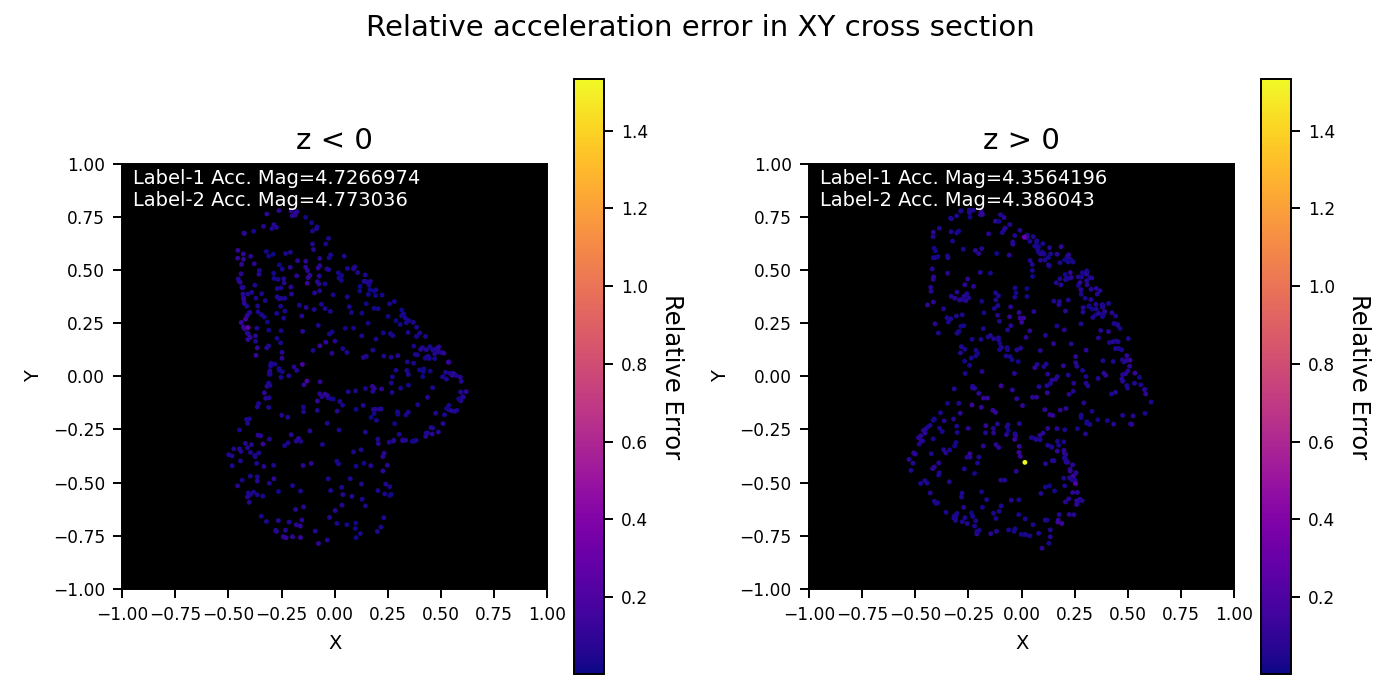

(<AxesSubplot: title={'center': 'z > 0'}, xlabel='X', ylabel='Y'>,
 tensor([[-1.6811,  2.1108, -1.5777],
         [-2.9070, -0.4739, -1.5369],
         [-0.0734,  0.6034, -2.9745],
         ...,
         [ 1.7911,  0.5534, -2.2801],
         [-1.4029,  1.1641, -2.4726],
         [ 2.6165, -0.7271, -0.8011]]))

In [13]:
gravann.polyhedral.plot_compare_acceleration(SAMPLE_NAME,
                                             compare_mode=('model', 'polyhedral'),
                                             model_1=(mascon_model, encoding, mascon_c),
                                             plane="XY",
                                             N=NUMBER_OF_POINTS_FOR_COMPARISON,
                                             logscale=False,
                                             altitude=1e-5)

In [14]:
mascon_model2polyhedral_gt = gravann.validation_v2(mascon_model, encoding, SAMPLE_NAME, 'polyhedral', use_acc=True,
                mesh_vertices=mesh_vertices,
                mesh_faces=mesh_faces,
                N=NUMBER_OF_POINTS_FOR_VALIDATION,
                N_integration=N_QUADRATUR,
                batch_size=BATCH_SIZE,
                progressbar=True)

Computing validation...:  65%|████████████████████████████████▍                 | 55000/84894 [02:25<01:05, 455.52it/s]

Discarding 2987 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  77%|██████████████████████████████████████▎           | 65000/84894 [03:14<00:56, 351.77it/s]

Discarding 8598 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...:  88%|████████████████████████████████████████████▏     | 75000/84894 [03:58<00:28, 344.36it/s]

Discarding 15222 of 18294 points in altitude sampler which did not meet requested altitude.


Computing validation...: 85000it [04:34, 309.32it/s]                                                                   


In [15]:
mascon_model2polyhedral_gt

,Altitude,Normalized L1 Loss,Normalized Relative Component Loss,RMSE,relRMSE
0,Low Altitude,0.061271,0.065414,0.328368,0.121819
1,High Altitude,0.028667,0.036236,0.268281,0.118408
2,Altitude_0,0.025697,0.029862,0.088063,0.034031
3,Altitude_1,0.010864,0.014495,0.038522,0.016985
4,Altitude_2,0.003806,0.007878,0.036997,0.030743


## 6 - Comparing polyhedral trained NN & mascon trained NN

Discarding 0 of 18294 points in altitude sampler which did not meet requested altitude.
Splitting in left / right hemisphere
Left:  468  points.
Right:  532  points.


<IPython.core.display.Javascript object>


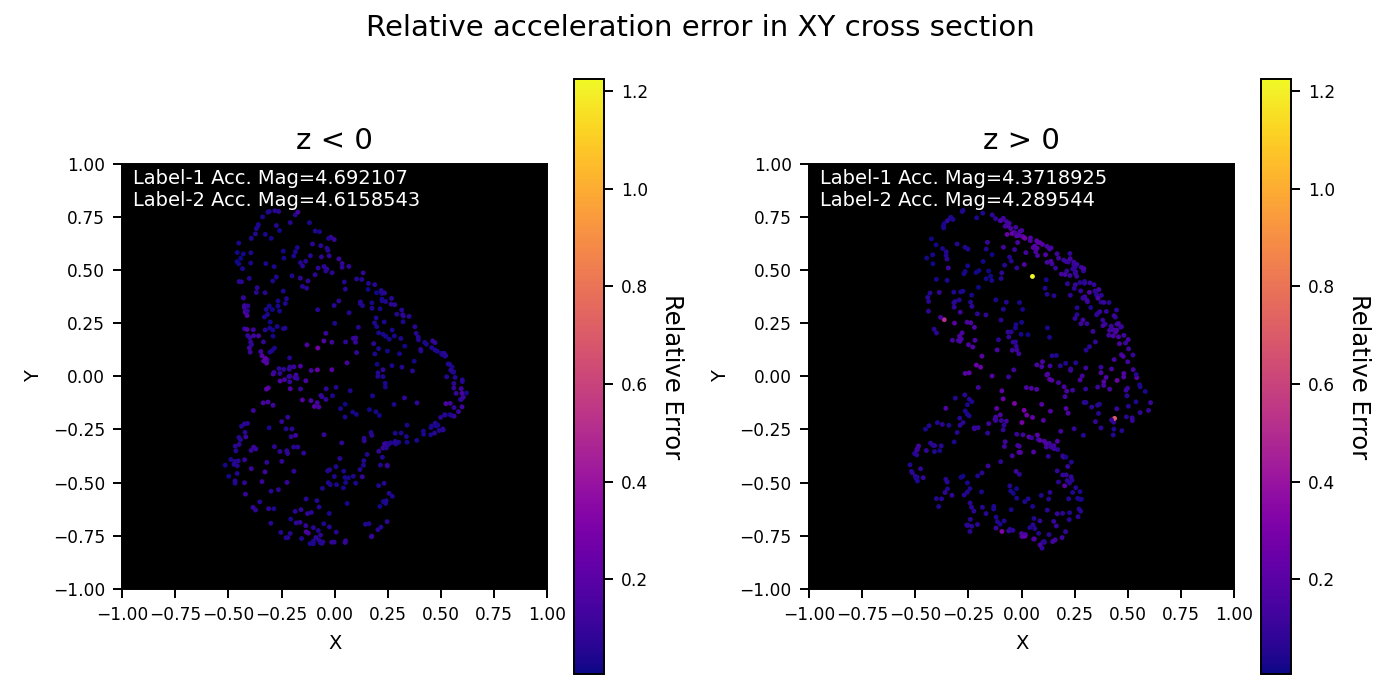

(<AxesSubplot: title={'center': 'z > 0'}, xlabel='X', ylabel='Y'>,
 tensor([[-1.2109, -1.9704, -1.2491],
         [-1.2972, -2.6126, -0.6390],
         [ 0.4593, -1.2807, -2.4904],
         ...,
         [ 1.6484, -2.5663, -0.1727],
         [ 1.8808, -2.4674, -0.0645],
         [-1.5953,  0.8553, -2.3939]]))

In [16]:
gravann.polyhedral.plot_compare_acceleration(SAMPLE_NAME,
                                             compare_mode=('model', 'model'),
                                             model_1=(mascon_model, encoding, mascon_c),
                                             model_2=(polyhedral_model, encoding, polyhedral_c),
                                             plane="XY",
                                             N=NUMBER_OF_POINTS_FOR_COMPARISON,
                                             logscale=False,
                                             altitude=1e-5)